In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# TRAINING DATA

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train.shape

(891, 12)

In [6]:
train.size

10692

In [7]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train['Age'].isnull().sum()

177

In [10]:
median = train['Age'].median()

In [11]:
train['Age'].fillna(median, inplace=True)

In [12]:
train['Age'].isnull().sum()

0

In [13]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


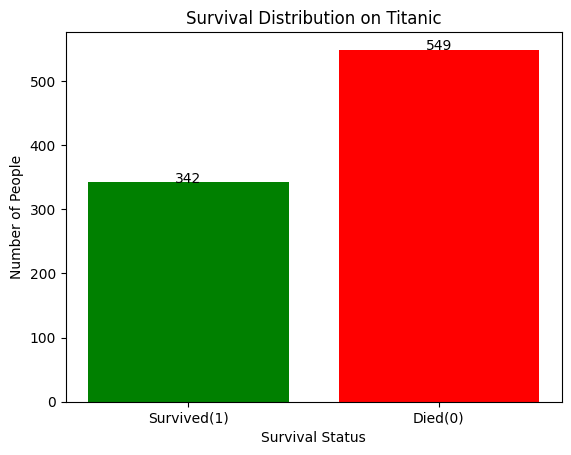

In [15]:
# Total Survival Distribution on titanic
lived = train[train['Survived'] == 1].shape[0]
died = train[train['Survived'] == 0].shape[0]

labels = ['Survived(1)', 'Died(0)']
values = [lived, died]

plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Survival Status')
plt.ylabel('Number of People')
plt.title('Survival Distribution on Titanic')
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center')
plt.show()

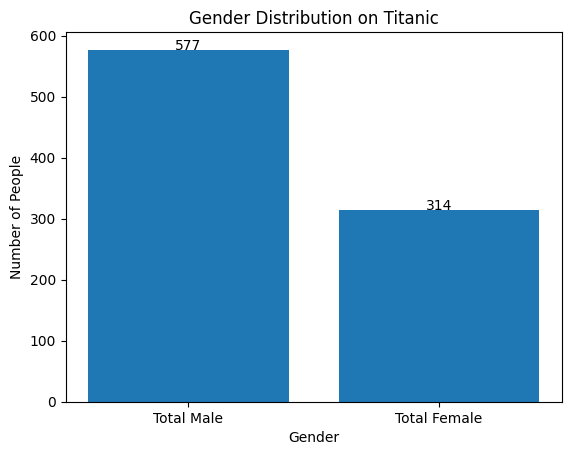

In [16]:
#Gender Distribution on Titanic
male = train[train['Sex'] == 'male'].shape[0]
female = train[train['Sex'] == 'female'].shape[0]

values = [male, female]
labels = ["Total Male", "Total Female"]
plt.bar(labels,values)
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.title('Gender Distribution on Titanic')
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center')
plt.show()

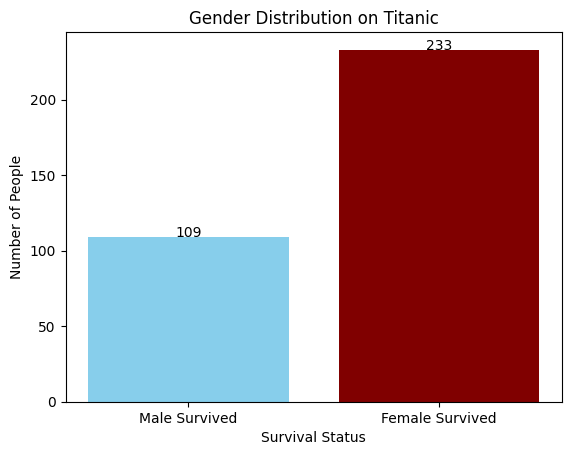

In [17]:
#Survived people on titanic
lived_male = train[(train['Survived'] == 1) & (train['Sex'] == 'male') ].shape[0]
lived_female = train[(train['Survived'] == 1) & (train['Sex'] == 'female') ].shape[0]

labels = ['Male Survived', 'Female Survived']
values = [lived_male, lived_female]
plt.bar(labels, values, color=['skyblue', 'maroon'])
plt.xlabel('Survival Status')
plt.ylabel('Number of People')
plt.title('Gender Distribution on Titanic')
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center')
plt.show()

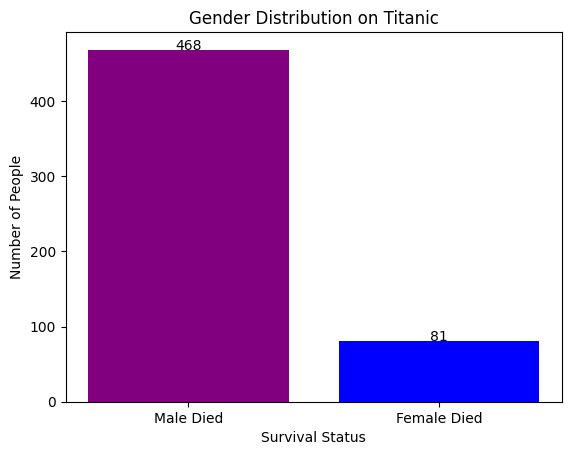

In [18]:
#Mortality on Titanic
died_male = train[(train['Survived'] == 0) & (train['Sex'] == 'male')].shape[0]
died_female = train[(train['Survived'] == 0) & (train['Sex'] == 'female')].shape[0]
labels = [ 'Male Died', 'Female Died']
values = [died_male, died_female]

plt.bar(labels, values, color=['purple', 'blue'])
plt.xlabel('Survival Status')
plt.ylabel('Number of People')
plt.title('Gender Distribution on Titanic')
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center')
plt.show()

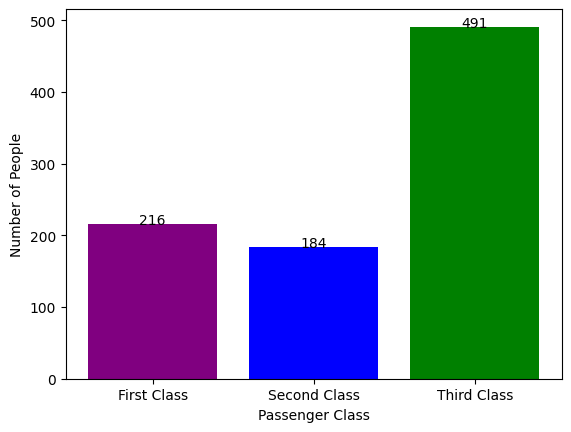

In [19]:
#total no of tickets
first_class= train[(train['Pclass'] == 1)].shape[0]
second_class= train[(train['Pclass'] == 2)].shape[0]
third_class= train[(train['Pclass'] == 3)].shape[0]
labels = [ 'First Class', 'Second Class', 'Third Class']
values = [first_class,second_class,third_class]

plt.bar(labels, values, color=['purple', 'blue', 'green'])
plt.xlabel('Passenger Class')
plt.ylabel('Number of People')
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center')
plt.show()

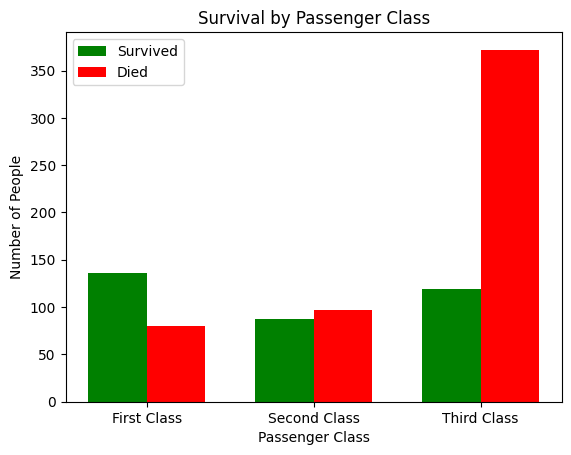

In [20]:
#Survival By Passenger Class
first_class_survived = train[(train['Pclass'] == 1) & (train['Survived'] == 1)].shape[0]
second_class_survived = train[(train['Pclass'] == 2) & (train['Survived'] == 1)].shape[0]
third_class_survived = train[(train['Pclass'] == 3) & (train['Survived'] == 1)].shape[0]

first_class_died = train[(train['Pclass'] == 1) & (train['Survived'] == 0)].shape[0]
second_class_died = train[(train['Pclass'] == 2) & (train['Survived'] == 0)].shape[0]
third_class_died = train[(train['Pclass'] == 3) & (train['Survived'] == 0)].shape[0]


labels = ['First Class', 'Second Class', 'Third Class']
survived_values = [first_class_survived, second_class_survived, third_class_survived]
died_values = [first_class_died, second_class_died, third_class_died]

bar_width = 0.35
index = range(len(labels))

fig, ax = plt.subplots()
bar1 = ax.bar(index, survived_values, bar_width, label='Survived', color='green')
bar2 = ax.bar([i + bar_width for i in index], died_values, bar_width, label='Died', color='red')

ax.set_xlabel('Passenger Class')
ax.set_ylabel('Number of People')
ax.set_title('Survival by Passenger Class')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [21]:
print(train['Age'].unique())

[22.   38.   26.   35.   28.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.  ]


In [22]:
train['Age'] = train['Age'].round()

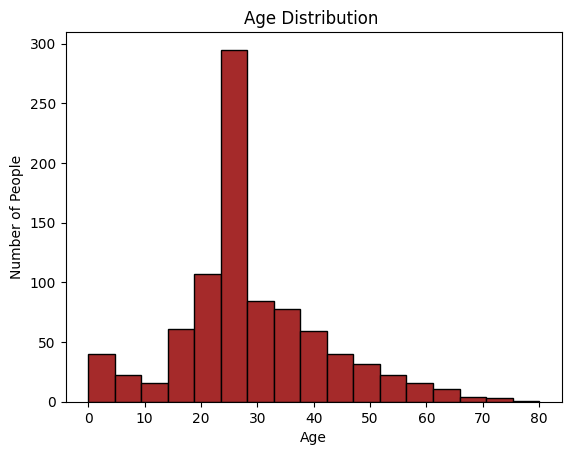

In [23]:
#Age Distribution
plt.hist(train['Age'], bins=17, color='brown',edgecolor = 'black', linewidth = 1)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age Distribution ')
plt.show()

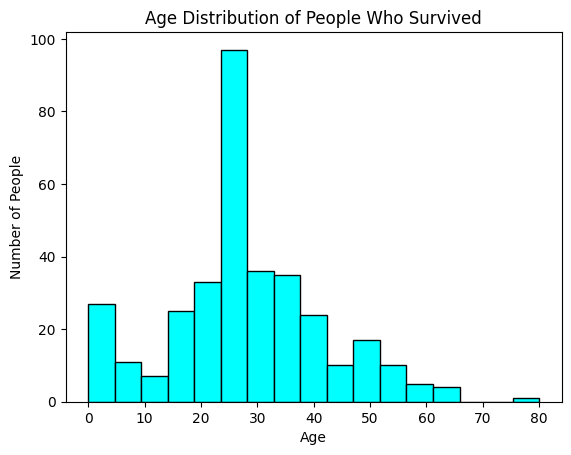

In [24]:
survived = train[train['Survived'] == 1]
plt.hist(survived['Age'].dropna(), bins=17, color='cyan',edgecolor = 'black', linewidth = 1)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age Distribution of People Who Survived')
plt.show()

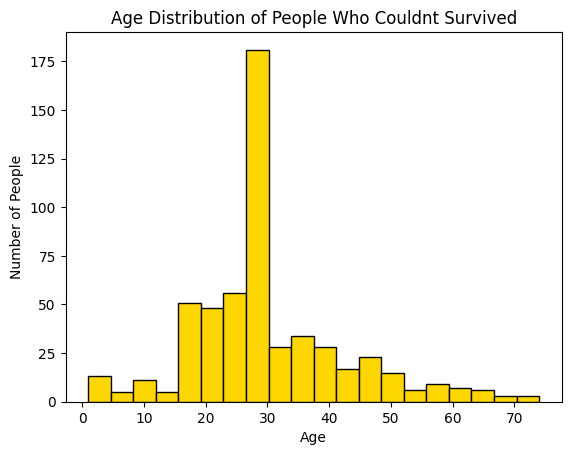

In [25]:
dead = train[train['Survived'] == 0]
plt.hist(dead['Age'].dropna(), bins=20, color='gold', edgecolor = 'black', linewidth = 1)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age Distribution of People Who Couldnt Survived')
plt.show()

In [26]:
train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Text(0, 0.5, 'Sib/Sp Count')

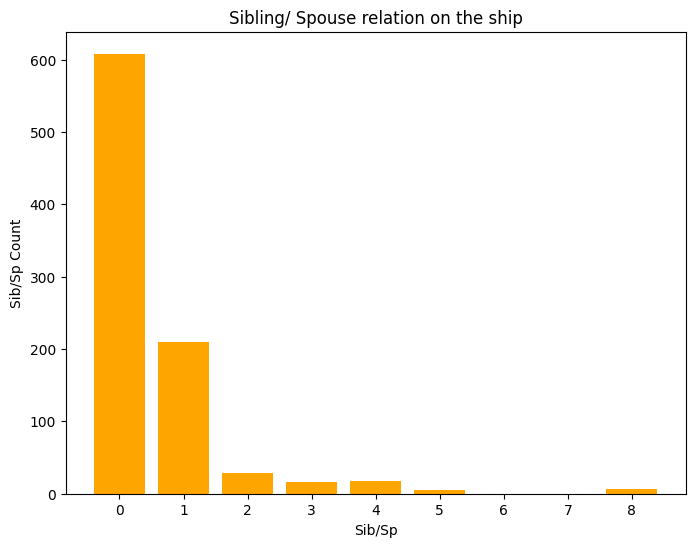

In [27]:
sibsp_counts = train['SibSp'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sibsp_counts.index, sibsp_counts.values, color = 'orange')
plt.title('Sibling/ Spouse relation on the ship')
plt.xticks(list(range(0,9)))
plt.xlabel('Sib/Sp')
plt.ylabel('Sib/Sp Count')

Text(0.5, 1.0, 'parents / children aboard the Titan')

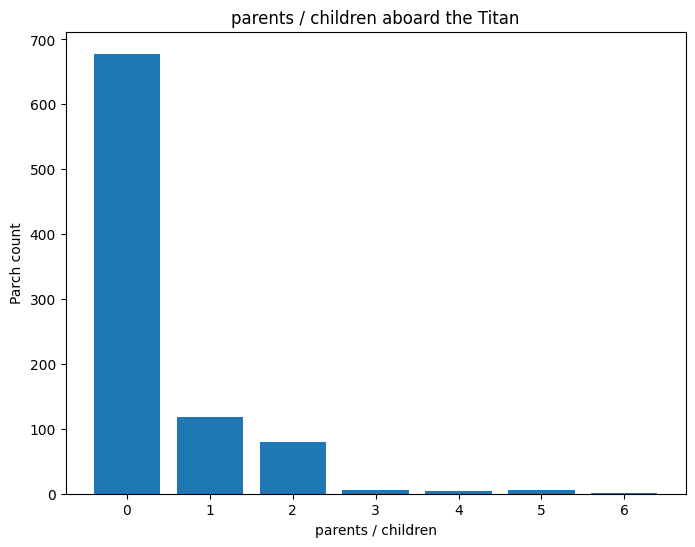

In [28]:
plt.figure(figsize = (8,6))
parch_counts = train['Parch'].value_counts()
plt.bar(parch_counts.index, parch_counts.values)
plt.xlabel("parents / children")
plt.ylabel("Parch count")
plt.title("parents / children aboard the Titan")

In [29]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Fair distribution among people')

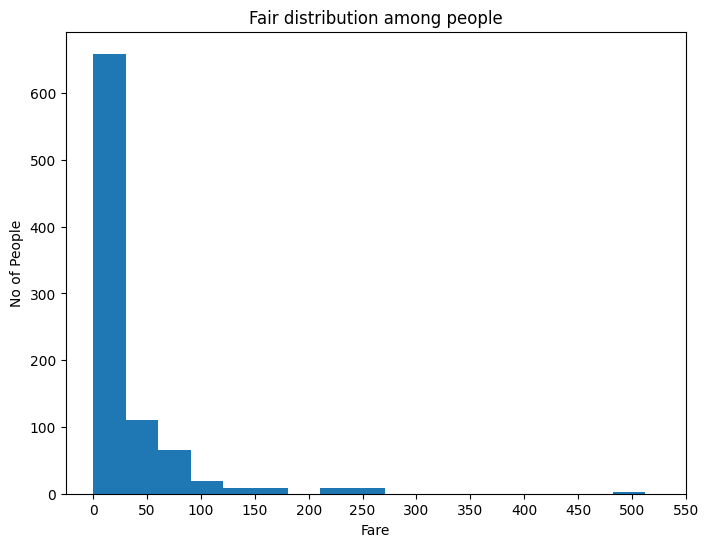

In [30]:
plt.figure(figsize=(8, 6))
plt.hist(train['Fare'],bins = 17, )
plt.xticks(list(range(0,600,50)))
plt.xlabel("Fare")
plt.ylabel('No of People')
plt.title("Fair distribution among people")

In [31]:
embarked = train['Embarked'].value_counts()

In [32]:
embarked['C'], embarked['S'], embarked['Q']

(168, 644, 77)

Text(0.5, 1.0, 'People embarked on different ports')

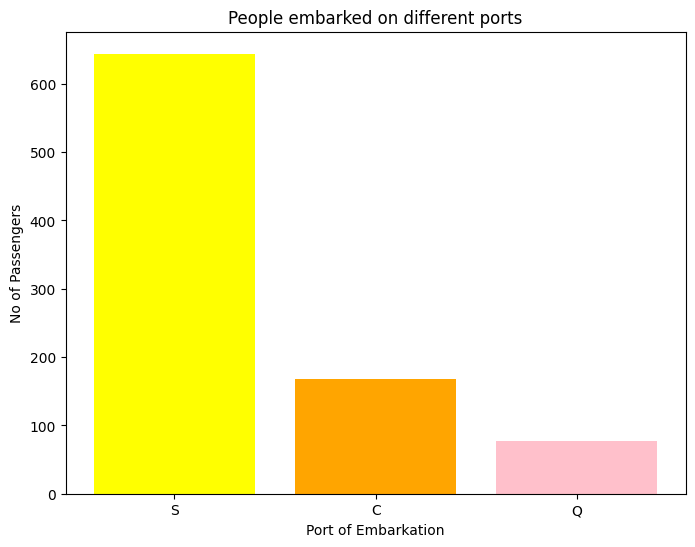

In [33]:
plt.figure(figsize = (8,6))
colors = ['yellow','orange','pink']
labels = ['C - Cherbourg', 'Q - Queenstown', 'S - Southampton']
plt.bar(embarked.index, embarked.values,color = colors)
plt.xlabel('Port of Embarkation')
plt.ylabel("No of Passengers")
plt.title("People embarked on different ports")

# TESTING DATA

In [34]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [36]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [37]:
test.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


In [38]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [39]:
test.shape

(418, 11)

In [40]:
test.size

4598

In [41]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [42]:
test['Age'].isnull().sum()

86

In [43]:
median = test['Age'].median()
print(median)

27.0


In [44]:
test['Age'].fillna(median, inplace=True)

In [45]:
test['Age'].isnull().sum()

0

In [46]:
#Dropping Unnecessary Columns
test = test.drop(["Name"], axis = 1)
test = test.drop(["Cabin"], axis = 1)
train = train.drop(["Name"], axis = 1)
train = train.drop(["Cabin"], axis = 1)
test = test.drop(["Ticket"], axis = 1)
train = train.drop(["Ticket"], axis = 1)

In [47]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [48]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [49]:
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64


In [50]:
train['Embarked'].ffill(inplace=True)

print(train['Embarked'].isna().sum())

0


In [51]:
#Categorical Data
embarked_map = {'S': 0, 'C': 1, 'Q': 2}
train['Embarked'] = train['Embarked'].map(embarked_map)
gender_map = {'male': 0, 'female': 1}
train['Sex'] = train['Sex'].map(gender_map)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [53]:
train.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,0,27.0,0,0,13.00,0
887,888,1,1,1,19.0,0,0,30.00,0
888,889,0,3,1,28.0,1,2,23.45,0
889,890,1,1,0,26.0,0,0,30.00,1
890,891,0,3,0,32.0,0,0,7.75,2


#### MODEL TRAINING

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(train.drop(['Survived'], axis = 1),train['Survived'], test_size = 0.35, random_state = 4)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
logmodel = LogisticRegression(max_iter = 1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [58]:
predictions = logmodel.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
accuracy=confusion_matrix(y_test,predictions)

In [61]:
accuracy

array([[183,  22],
       [ 31,  76]], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy=accuracy_score(y_test,predictions)
print("Model Accuracy: ",accuracy)

Model Accuracy:  0.8301282051282052


In [64]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [65]:
#Categorical Data
embarked_map_test = {'S': 0, 'C': 1, 'Q': 2}
test['Embarked'] = test['Embarked'].map(embarked_map_test)
gender_map_test = {'male': 0, 'female': 1}
test['Sex'] = test['Sex'].map(gender_map_test)

In [66]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


In [67]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [68]:
test['Fare'].ffill(inplace=True)

In [69]:
test_predictions = logmodel.predict(test)

In [73]:
print("Length of test_data:", len(test))
print("Length of test predictions: ",len(test_predictions))


Length of test_data: 418
Length of test predictions:  418


In [71]:
test_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [72]:
test['Survived'] = test_predictions
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,0,34.5,0,0,7.8292,2,0
1,893,3,1,47.0,1,0,7.0000,0,0
2,894,2,0,62.0,0,0,9.6875,2,0
3,895,3,0,27.0,0,0,8.6625,0,0
4,896,3,1,22.0,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0,8.0500,0,0
414,1306,1,1,39.0,0,0,108.9000,1,1
415,1307,3,0,38.5,0,0,7.2500,0,0
416,1308,3,0,27.0,0,0,8.0500,0,0
